In [1]:
# Plots
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
measurements = session.query(Measurements.date).all()
mostRecent = max(measurements)
mostRecent

('2017-08-23')

(array([736208., 736269., 736330., 736389., 736450., 736511.]),
 <a list of 6 Text major ticklabel objects>)

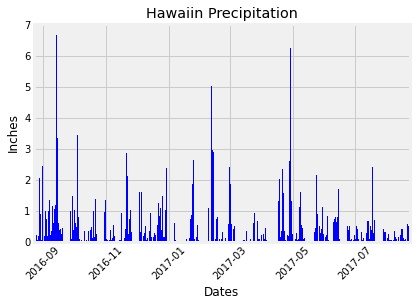

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database. 
lastReading = dt.date(2017,8,23)

# Calculate the date one year from the last date in data set.
yearBefore = lastReading - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= yearBefore).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip)
# Reset dataframe index to the associated date 
precip_df = precip_df.set_index('date')
# Replace null entries
precip_df.fillna(0,inplace=True)

# Sort the dataframe by date
precip_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
measurements = precip_df["prcp"]
# Capture the index for plotting
dates = precip_df.index
# Convert to datetime
dates = pd.to_datetime(dates)

#Plot based on previously colected series
plt.bar(dates, measurements, color='blue')
plt.title('Hawaiin Precipitation')
plt.xlabel('Dates')
plt.ylabel('Inches')
plt.xlim({yearBefore,lastReading})
plt.xticks(rotation=45)

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
round(precip_df.agg({'prcp':['mean','median','var','std','sem']}),2)

,prcp
mean,0.16
median,0.01
var,0.20
std,0.44
sem,0.01


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
stationCount = session.query(Stations.station).count()
stationCount

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
mostActive = session.query(Measurements.station,func.count(Measurements.station)).filter(Measurements.station == Stations.station).group_by(Stations.name).order_by(func.count(Measurements.station).desc()).all()
mostActive

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tempCalcs = session.query(Measurements.tobs).filter(Measurements.station == 'USC00519281').all()
lowTemp = min(tempCalcs)
highTemp = max(tempCalcs)
allTemps = pd.Series(list(np.ravel(tempCalcs)),dtype='int32')
avgTemp = round(allTemps.mean(),2)

print('At the most active station USC00519281')
print(f'Highest Temp Recorded: {highTemp[0]}')
print(f'Lowest Temp Recorded: {lowTemp[0]}')
print(f'Average Temp Recorded: {avgTemp}')

At the most active station USC00519281
Highest Temp Recorded: 85.0
Lowest Temp Recorded: 54.0
Average Temp Recorded: 71.66


Text(0, 0.5, 'Frequency')

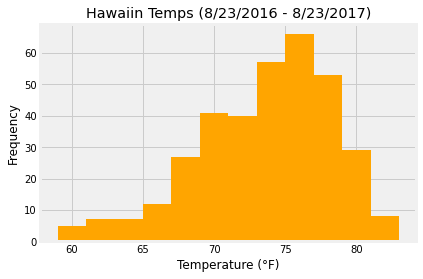

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(Measurements.tobs).filter(Measurements.date >= yearBefore).filter(Measurements.station == 'USC00519281').all()
temps = list(np.ravel(temps))
temps = pd.Series(temps)

#Plot based on previously colected series
plt.hist(temps, bins=12,color='orange')
plt.title("Hawaiin Temps (8/23/2016 - 8/23/2017)")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")

# Close session

In [20]:
# Close Session
session.close()